# Data preprocessing on heart health

### importing the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

dataSet = pd.read_csv('heart_2020_cleaned.csv')

### viewing the dataset

In [2]:
dataSet.head() #viewing top 5 in the dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**physical health and mental health value is in days

In [3]:
dataSet.shape

(319795, 18)

In [4]:
dataSet.head(30) #extending the view to see more about the dataSet

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


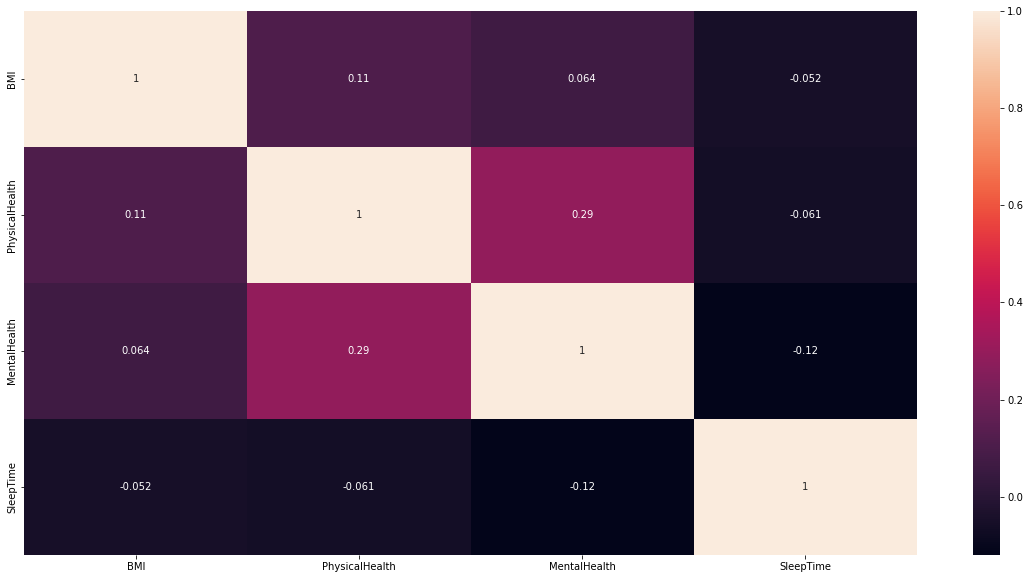

In [5]:
plt.figure(figsize = (20,10))
sns.heatmap(dataSet.corr(),annot = True)
plt.show()

### checking for nulls/NANs

In [6]:
dataSet.isnull().sum() #checking for null values in our dataset

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
'''
now lets split the features and o/p;
our output (label) is HeartDisease.

'''
#extracting the ouput
labels = dataSet['HeartDisease'].values
labels

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [8]:
#extracting the features as numpy array

features = dataSet.iloc[:,1:].values #from the second column to the last one
features

array([[16.6, 'Yes', 'No', ..., 'Yes', 'No', 'Yes'],
       [20.34, 'No', 'No', ..., 'No', 'No', 'No'],
       [26.58, 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ...,
       [24.24, 'No', 'No', ..., 'No', 'No', 'No'],
       [32.81, 'No', 'No', ..., 'No', 'No', 'No'],
       [46.56, 'No', 'No', ..., 'No', 'No', 'No']], dtype=object)

In [9]:
#extracting the features without the Heart Disease

features2 = dataSet.iloc[:,1:] #from the second column to the last one
features2

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### data encoding:

In [10]:
#first we need to see our non-numeric columns to deal with it

dataSet.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [11]:
temp = dataSet.select_dtypes(include=['object']).copy()
temp.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [12]:
from sklearn.preprocessing import LabelEncoder #importing the labelEncoder

le = LabelEncoder()
label = le.fit_transform(labels) #applying label encoder to our label (o/p)
label

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
dataSet.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# Showing the variables with Binary Strings ...

In [14]:
dataSet["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
dataSet["Smoking"].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
dataSet["AlcoholDrinking"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
dataSet["Stroke"].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
dataSet["DiffWalking"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
dataSet["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
dataSet["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [21]:
dataSet["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [22]:
dataSet["PhysicalActivity"].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
dataSet["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [24]:
dataSet["Asthma"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
dataSet["KidneyDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
dataSet["SkinCancer"].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
dataSet["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [28]:
# Transforming The binary (Yes / No) Strings into encoded values.
dataSet['HeartDisease'] = le.fit_transform(dataSet['HeartDisease'])
dataSet['Smoking'] = le.fit_transform(dataSet['Smoking'])
dataSet['AlcoholDrinking'] = le.fit_transform(dataSet['AlcoholDrinking'])
dataSet['Stroke'] = le.fit_transform(dataSet['Stroke'])
dataSet['DiffWalking'] = le.fit_transform(dataSet['DiffWalking'])
dataSet['Sex'] = le.fit_transform(dataSet['Sex'])
dataSet['PhysicalActivity'] = le.fit_transform(dataSet['PhysicalActivity'])
dataSet['Asthma'] = le.fit_transform(dataSet['Asthma'])
dataSet['KidneyDisease'] = le.fit_transform(dataSet['KidneyDisease'])
dataSet['SkinCancer'] = le.fit_transform(dataSet['SkinCancer'])

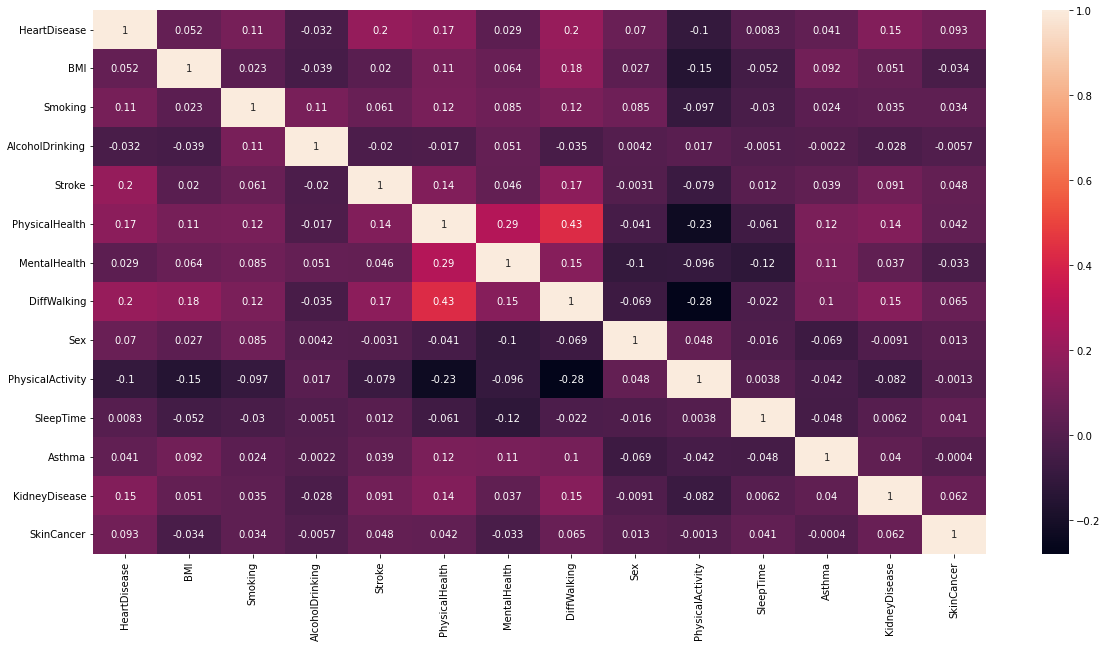

In [29]:
# DataSet Heatmap visualization with HeartDisease
plt.figure(figsize = (20,10))
sns.heatmap(dataSet.corr(),annot = True)
plt.show()

In [30]:
features2['Smoking'] = le.fit_transform(dataSet['Smoking'])
features2['AlcoholDrinking'] = le.fit_transform(dataSet['AlcoholDrinking'])
features2['Stroke'] = le.fit_transform(dataSet['Stroke'])
features2['DiffWalking'] = le.fit_transform(dataSet['DiffWalking'])
features2['Sex'] = le.fit_transform(dataSet['Sex'])
features2['PhysicalActivity'] = le.fit_transform(dataSet['PhysicalActivity'])
features2['Asthma'] = le.fit_transform(dataSet['Asthma'])
features2['KidneyDisease'] = le.fit_transform(dataSet['KidneyDisease'])
features2['SkinCancer'] = le.fit_transform(dataSet['SkinCancer'])

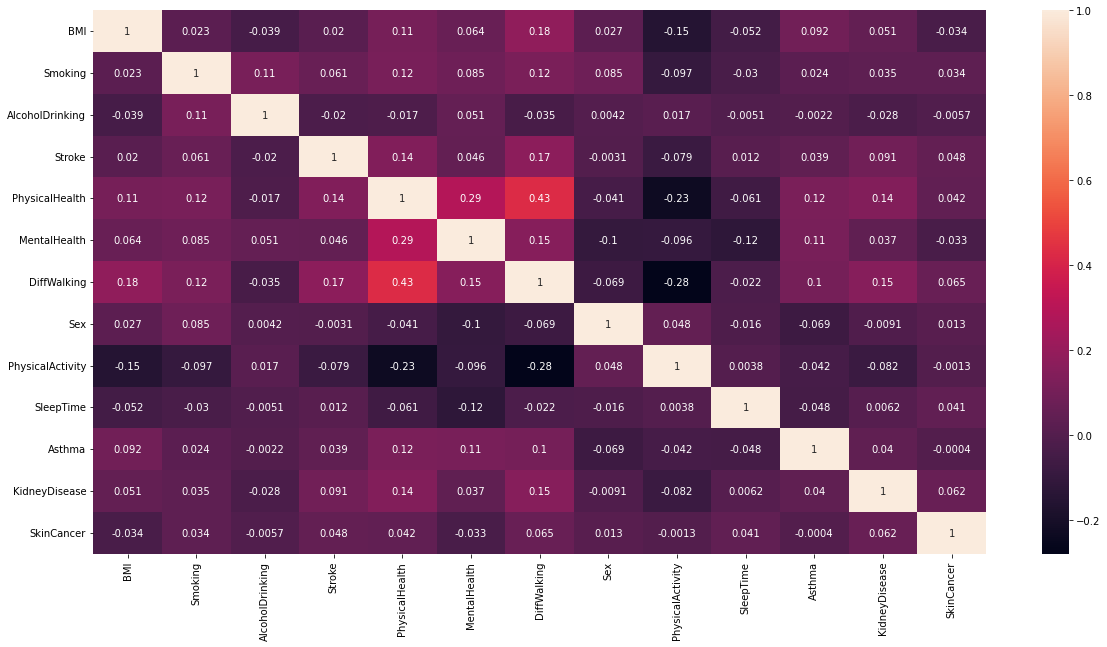

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(features2.corr(),annot = True)
plt.show()

## DataSet Removing Strings Multivalues ...

In [32]:
dataSet = pd.get_dummies(dataSet, columns = ['AgeCategory', 'Race',  'Diabetic', 'GenHealth'])

In [33]:
dataSet.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
5,1,28.87,1,0,0,6.0,0.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
9,0,40.69,0,0,0,0.0,0.0,1,1,1,...,1,1,0,0,0,0,0,1,0,0


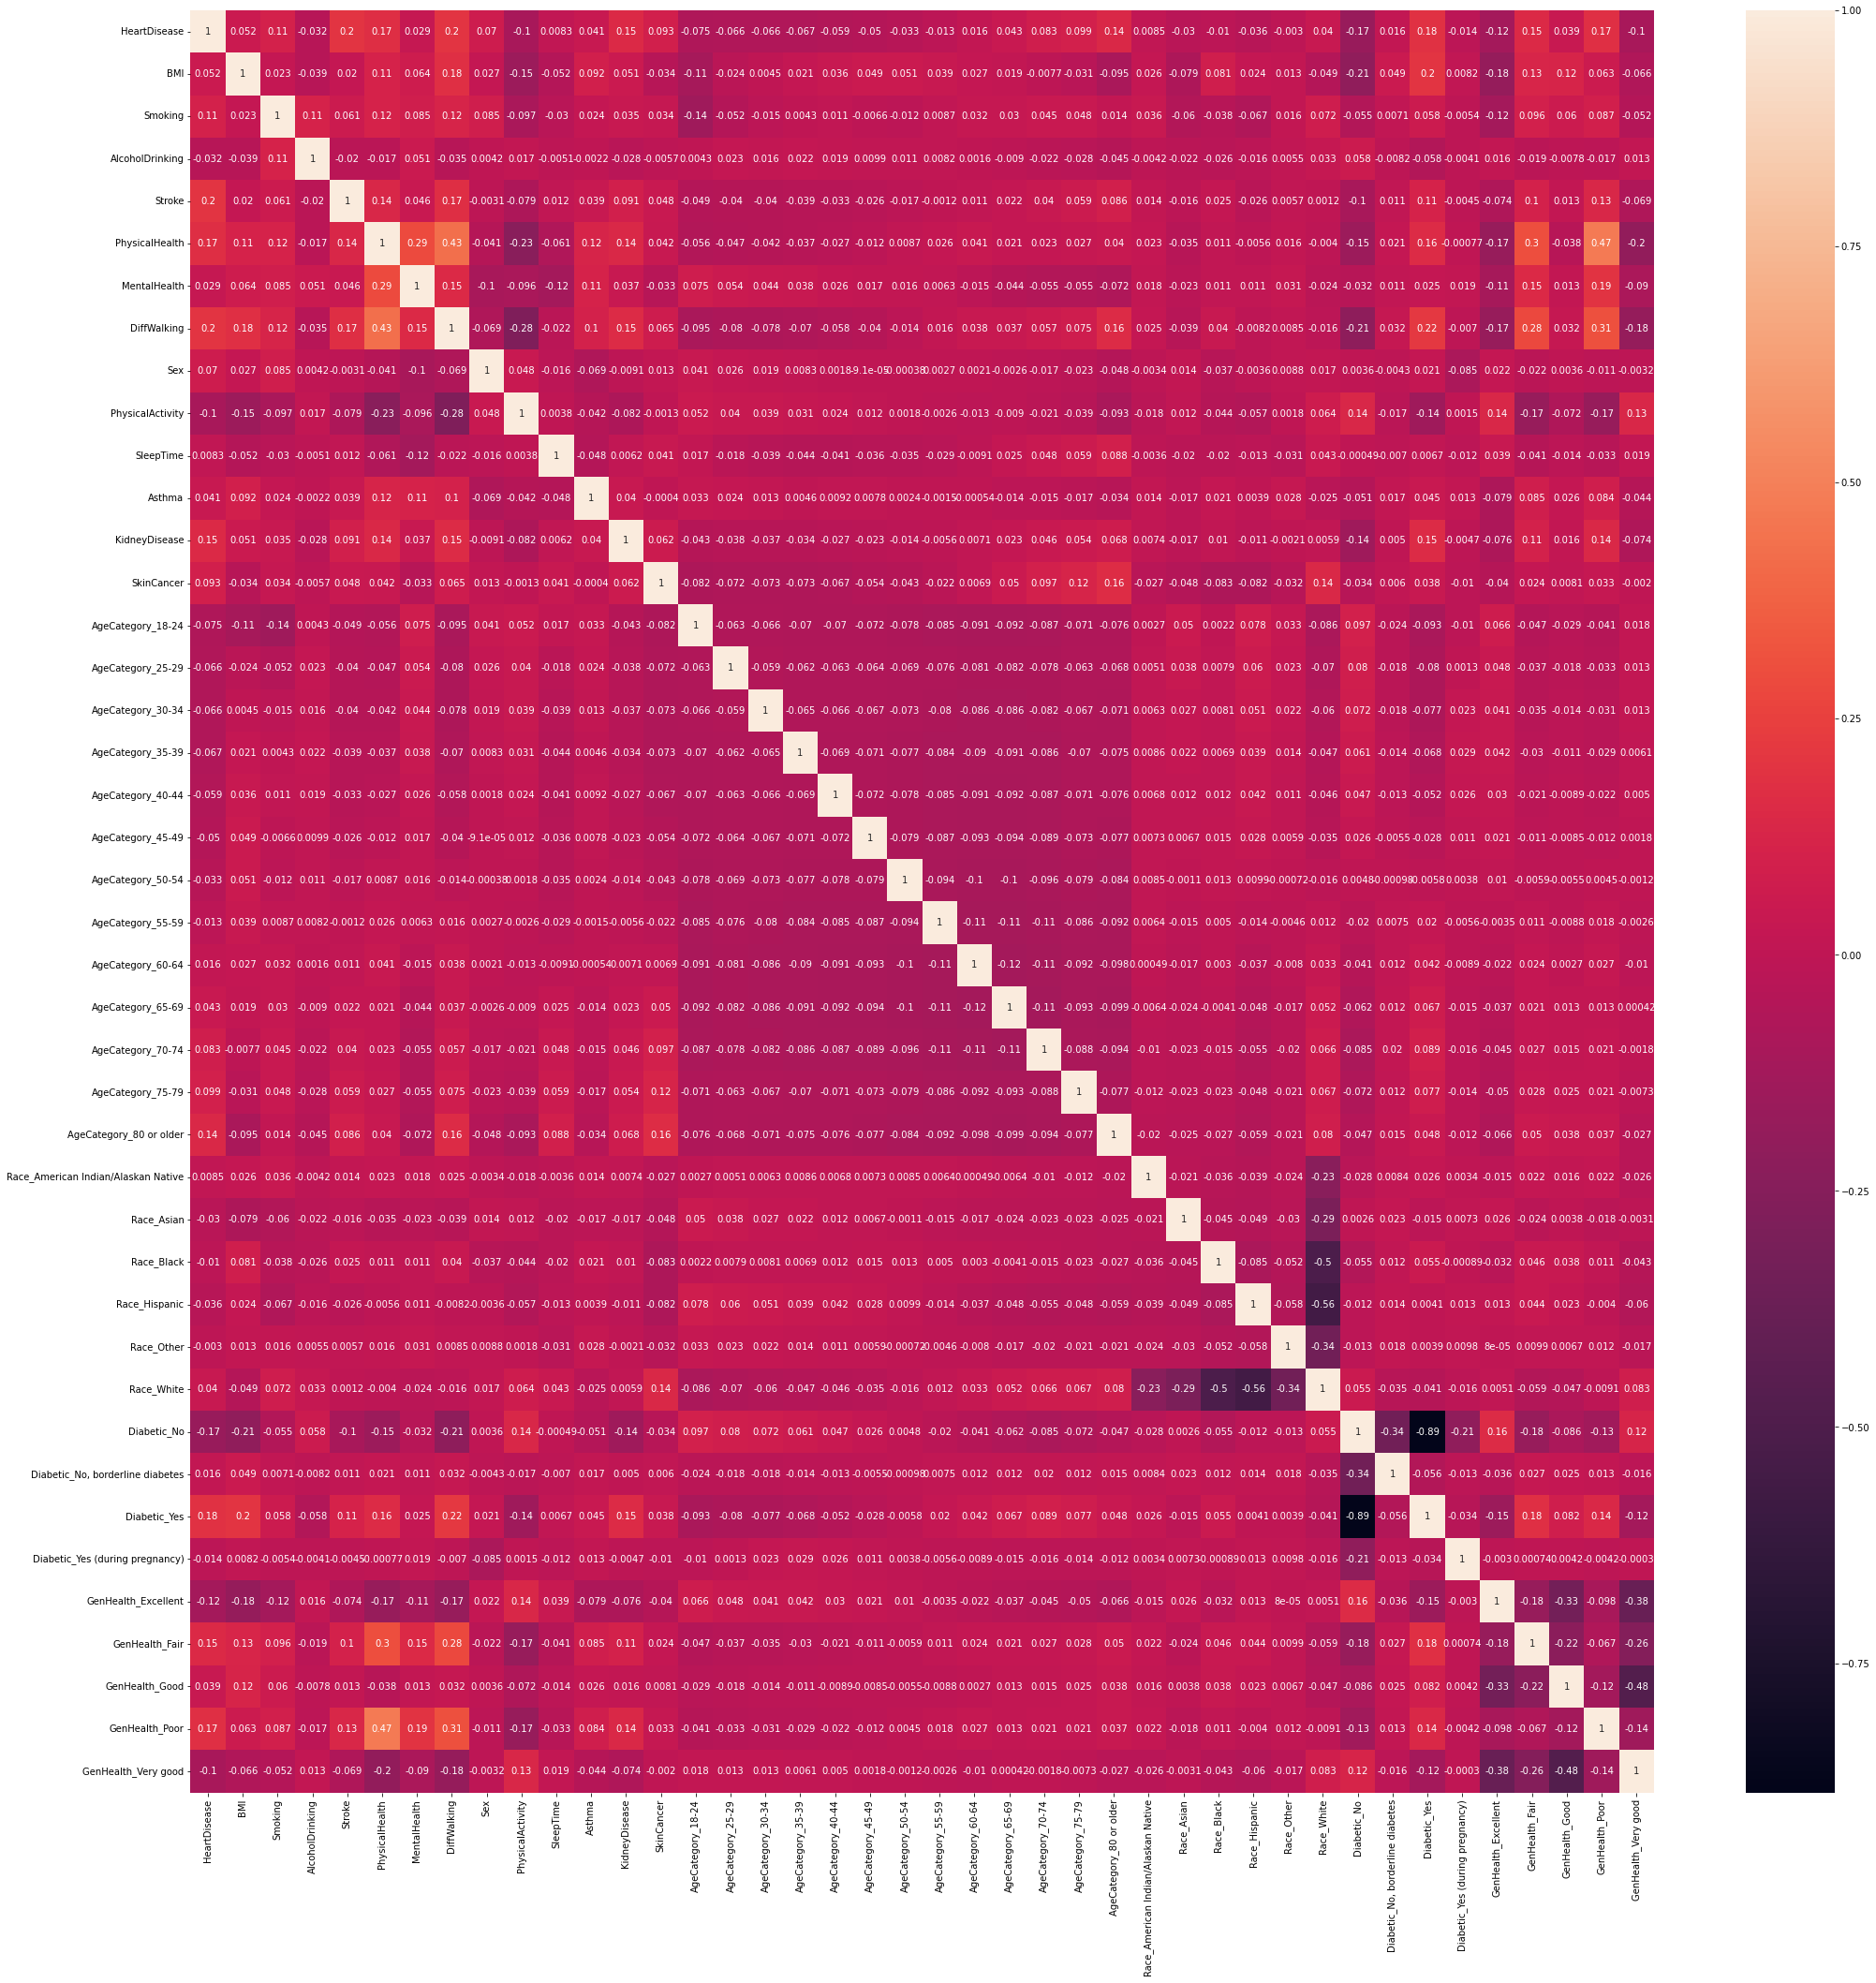

In [34]:
plt.figure(figsize = (35,35))
sns.heatmap(dataSet.corr(),annot = True)
plt.show()

In [35]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int32  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int32  
 3   AlcoholDrinking                      319795 non-null  int32  
 4   Stroke                               319795 non-null  int32  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int32  
 8   Sex                                  319795 non-null  int32  
 9   PhysicalActivity                     319795 non-null  int32  
 10  SleepTime                            319795 non-null  float64
 11  Asthma       